<a href="https://colab.research.google.com/github/thehapyone/Thesis_Project/blob/master/data_evaluation_v1_Analyze_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering - Analyze Missing Values


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns


In [0]:
data_full = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


In [0]:
data_full.shape

(19954, 449)

In [0]:
data_full

,BIWEEK_SEND_DATE,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,LX_PMU_P1FH1_SLOPE_X_INDEX_9,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_1,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_10,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_11,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_12,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_13,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_14,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_15,...,VAR_VWX_COMPRESSOR_CAPACITY,VAR_DAX_AXLE_ARRANGEMENT,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0005_VEHICLE_OPERATION_DIGIT1,VFE_0006_VEHICLE_OPERATION_DIGIT2,VFE_0007_CAB_HEIGHT,VFE_0008_HAS_PTO,LAST_RUN.1,Malfunction_Label,RUL
0,2016-05-01,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,237784.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2COMP900,6*4,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,1,2,CABH215,1,2019-05-14 10:32:00,0,39.0
1,2016-05-15,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,243480.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2COMP900,6*4,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,1,2,CABH215,1,2019-05-14 10:32:00,0,25.0
2,2016-06-01,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000,162794.500000,125879.000000,74443.500000,34075.

In [0]:
# now we will resort the data_full
data_full.sort_values(by=['T_CHASSIS', 'BIWEEK_SEND_DATE'])[data_full['T_CHASSIS'] == 'N-748612']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,BIWEEK_SEND_DATE,DELIVERY_DATE.1,DELIVERY_DATE,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,LX_PMU_P1FH1_SLOPE_X_INDEX_9,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_1,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_10,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_11,...,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT,Malfunction_Label,RUL
20791,01-01-2017,13-07-2013,13-07-2013,22-05-2019 01:50,14-05-2019 10:32,N-748612,17167,8.434213e+05,2490246.333,6039012.000,12301626.67,23028341.00,45722032.67,129204548.3,138259670.3,46268201.00,22351240.33,130.0,12562486.33,6.501233e+06,2432365.000,7.498807e+05,242693.3333,71002.66667,20568.00000,9996.00000,4288.333333,1787.000000,591.00,177.000000,17.0,2724.000000,4738.00,11098.00,27236.00000,96952.00,306547.0000,1618.467249,457.133188,909.838428,...,CCV-OX,TC-LONGD,WTCOOL,BR-DIBAS,FAL7.1,2COM1080,TURBO-S,RAA11,UHPG,FSI-TARM,UDAS,TURB-B,FAA1,RET-TH,VUPT-A1,NONE,FSS-AIR,UPTOENGR,24AL150B,PH-CAB2,UWVTAPPR,TGW-3GWL,AT261,RC-SMOOT,CTILTP-M,EML4,TRACTOR,UEPTT,CABH230,UACTST,UADRC,Med,Med,K,RAL11.5,RAL11.5,DEMAND_LONG_HAUL,CABH230,0,964.0
20815,01-01-2018,13-07-2013,13-07-2013,22-05-2019 01:50,14-05-2019 10:32,N-748612,17532,1.102669e+06,3245406.333,7831383.667,15909369.67,30077959.67,59182688.33,164998433.7,175731701.0,59755102.67,28944192.33,130.0,16195289.67,8.461458e+06,3146980.000,9.667833e+05,324970.6667,95971.66667,25896.66667,12778.66667,5590.000000,3267.000000,591.00,748.000000,34.0,3009.000000,5277.00,12847.00,33238.33333,129934.00,394144.0000,2182.000000,476.000000,925.000000,...,CCV-OX,TC-LONGD,WTCOOL,BR-DIBAS,FAL7.1,2COM1080,TURBO-S,RAA11,UHPG,FSI-TARM,UDAS,TURB-B,FAA1,RET-TH,VUPT-A1,NONE,FSS-AIR,UPTOENGR,24AL150B,PH-CAB2,UWVTAPPR,TGW-3GWL,AT261,RC-SMOOT,CTILTP-M,EML4,TRACTOR,UEPTT,CABH230,UACTST,UADRC,Med,Med,K,RAL11.5,RAL11.5,DEMAND_LONG_HAUL,CABH230,0,988.0
20839,01-01-2019,13-07-2013,13-07-2013,22-05-2019 01:50,14-05-2019 10:32,N-748612,17897,1.367636e+06,3974727.000,9512325.000,19411593.50,36815704.50,72082448.50,199368802.0,213341283.0,72835936.50,35214281.50,152.0,19708882.00,1.022333e+07,3830267.000,1.174693e+06,390737.5000,118155.50000,31499.00000,15997.50

In [0]:
# finding column data with almost zero standard deviation. 
std_data = data_full.describe().transpose().loc[:,'std']

In [0]:
# this columns have zero standard deviation
std_data[std_data == 0]

X_PST_P1C2J_527_TLDRIVINGMONSYSTEMRECOMMENDEDG    0.0
X_PSC_P1JRU_AUTOMATIC_SOOT_DISTANCE_REGENE        0.0
X_PSC_P1JR5_AUTOMATIC_SULPHUR_DPF_REGENERA        0.0
X_PSC_P1JR2_AUTOMATIC_HC_DPF_REGENERATION_        0.0
X_PSC_P1AL0_DIFFERENTIATED_RSL_ENABLE             0.0
X_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_20      0.0
Name: std, dtype: float64

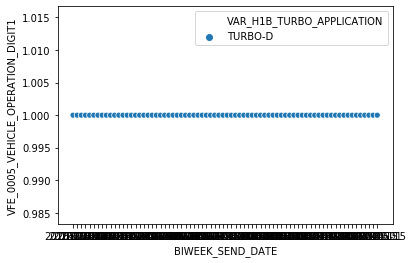

In [0]:
# scatter_plot
sns.scatterplot(x='BIWEEK_SEND_DATE', y='VFE_0005_VEHICLE_OPERATION_DIGIT1', hue='VAR_H1B_TURBO_APPLICATION', data=data_sample)